# Importing the Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

# Data Collection 

In [16]:
df = pd.read_csv('EastWestAirlines.csv')

In [17]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
df_norm = preprocessing.scale(df)

In [19]:
df_norm = pd.DataFrame(df_norm) # standardize the data to normal distribution

In [20]:
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


# Finding out the optimal number of clusters

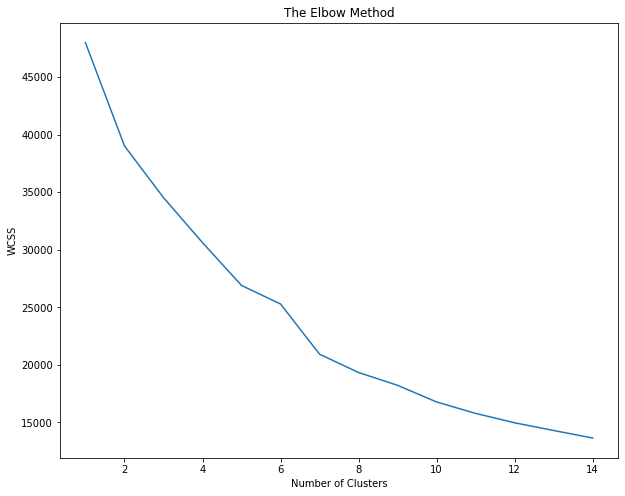

In [21]:
plt.figure(figsize=(10,8))
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### As we can see, the elbow graph changes at 2. However, the splitting of dataset into 2 groups would not be so good. That's why, we will further evaluate clusters for higher values of k.

# 4 -  Euclidean Distance

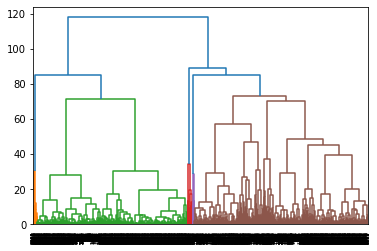

In [23]:
dendogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

### We can see that as the height increases the clusters get grouped together.
### We decided to cut the tree at height 85 to obtain 3 clusters and then assigned each cluster with its respective observations.

In [24]:
X = df_norm.values

In [25]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')

In [26]:
h_clusters = model.fit(X)

In [27]:
labels = model.labels_

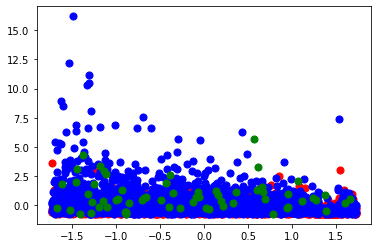

In [28]:
plt.scatter(X[labels==0,0],X[labels==0,1],s=50,marker='o',color='red')
plt.scatter(X[labels==1,0],X[labels==1,1],s=50,marker='o',color='blue')
plt.scatter(X[labels==2,0],X[labels==2,1],s=50,marker='o',color='green')

# 5 - K Means

In [29]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)
k_means = kmeans.fit_predict(df_norm)

In [30]:
k_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [31]:
k_means1 = k_means+1
k_cluster = list(k_means1)

In [33]:
df['k_cluster'] = k_cluster

In [38]:
pd.DataFrame(round(df.groupby('k_cluster').mean(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2327.1,42243.6,91.1,1.2,1.0,1.0,4896.4,7.0,194.4,0.6,3549.8,0.2
2,1445.6,119557.7,165.6,3.6,1.0,1.0,38921.2,18.6,351.2,1.1,5147.4,0.6
3,1753.1,189304.2,788.7,2.2,1.0,1.0,31780.5,27.1,5420.4,15.8,4657.0,0.8


In [36]:
pd.DataFrame(round(df.groupby('k_cluster').count(),1))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
k_cluster,,,,,,,,,,,,
1,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
2,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
3,164,164,164,164,164,164,164,164,164,164,164,164


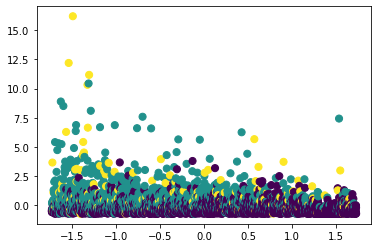

In [37]:
plt.scatter(X[:,0],X[:,1],c=k_means, s=50, cmap='viridis')

# 5 - Conclusion

From the above data generated from K-Means clustering, we can see cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 and 2. Cluster 1 contains less frequent or firt time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.